#SPRINT_2(IMAGE_UPLOADING) [completed] 

#i)**Data Collection**
1.   Data augmentation structure creation
2.   Augmenting the data

#ii)**Loading data and Preprocessing**
1.   Make A List Of Paths To All Folders Where we Have Data
2.   Loading Images Into Machine Understandable Data
3.   Data Splitting Into Train And Test

#iii)**SPRINT_3(Training & Testing)**

#i)**Started With Convolutional Neural Networks**
1.   Start (Sequential)
2.   Adding Layers ( Conv, Maxpool, Flatten, Dense, Dropout)
3.   Building Model (Compile, Fit, Predict )

#ii)**Evaluation And Model Saving**


1.   Evaluation (Accuracy And Losses)
2.   Model Saving And Loading








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#i)**Data Collection**
1.   Data augmentation structure creation
2.   Augmenting the data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import csv
from os import listdir
import time
from google.colab import drive
drive.mount('/content/drive')
# Nicely formatted time string to make a note of how much time it takes for augmentation 
def hms_string (sec_elapsed):
  h = int(sec_elapsed / (60 * 60))
  m = int((sec_elapsed % (60 * 60)) / 60) 
  S = sec_elapsed % 60
  return "{n}: {m}:{round(s,1)}"

def augment_data(file_dir, n_generated_samples, save_to_dir):
  """
  Arguments: file dir: A string representing the directory where images that we want to augment are found. 
  n generated samples: A string representing the number of generated samples using the given image.
  save to dir: A string representing the directory in which the generated images will be saved.
  """
#from keras.preprocessing.image import ImageDataGenerator 
#from os import listdir
  data_gen = ImageDataGenerator (rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.15,
                               shear_range=0.25,
                               zoom_range = 0.2,
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='nearest', 
                               brightness_range=(0.5,1.2)
                               )  
  for filename in listdir(file_dir):
      #load the image
      image = cv2.imread(file_dir + '/' + filename) 
      # reshape the image 
      image=image.reshape((1,)+image.shape)
      # prefix of the names for the generated sampels. 
      save_prefix = 'aug_' + filename [:-4]
      # generate 'n_generated_samples' sample images 
      i=0
      for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                 save_prefix=save_prefix, save_format='jpg'):
        i += 1
        if i > n_generated_samples: 
           break

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
start_time = time.time()
augmented_data_path = '/content/drive/MyDrive/project/augmented data'
augment_data(file_dir='/content/drive/MyDrive/project/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird', n_generated_samples=8, save_to_dir=augmented_data_path+'/Bird/GIB_AUG')
augment_data(file_dir='/content/drive/MyDrive/project/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird', n_generated_samples=8, save_to_dir=augmented_data_path+'/Bird/SPS_AUG')
augment_data(file_dir='/content/drive/MyDrive/project/Digital Naturalist Dataset/Flower/Corpse Flower', n_generated_samples=8, save_to_dir=augmented_data_path+'/Flowers/Corpse_AUG')
augment_data(file_dir='/content/drive/MyDrive/project/Digital Naturalist Dataset/Flower/Lady Slipper Orchid Flower', n_generated_samples=8, save_to_dir=augmented_data_path+'/Flowers/LS_Orchid_AUG')
augment_data(file_dir='/content/drive/MyDrive/project/Digital Naturalist Dataset/Mammal/Pangolin Mammal', n_generated_samples=8, save_to_dir=augmented_data_path+'/Mammal/Pangolin_AUG')
augment_data(file_dir='/content/drive/MyDrive/project/Digital Naturalist Dataset/Mammal/Senenca White Deer Mammal', n_generated_samples=8, save_to_dir=augmented_data_path+'/Mammal/SW_Deer_AUG')

end_time = time.time()
execution_time = (end_time - start_time)
print("Elapsed Time : "+str(execution_time))

Elapsed Time : 64.78445506095886


#ii)Loading data and Preprocessing
1.   importing the libraries
2.   Make A List Of Paths To All Folders Where we Have Data
3.   Loading Images Into Machine Understandable Data
4.   Data Splitting Into Train And Test

In [25]:
#For matrix calculations and data Managememnt
import numpy as np
#Importing libraries required for the model
import tensorflow as tf
import keras
import keras.backend as K
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import * 
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras. models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization,Dropout
from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split
#For plotting charts used for data visualizations
import matplotlib.pyplot as plt
#Libraries for Locating and loading data
import glob
from PIL import Image
import os
from os import listdir

In [26]:
#setting path to our dataset folder
dirName = '/content/drive/MyDrive/project/augmented data'
folders = listdir(dirName)
#Getting the names for all the folders containing data
def getListOfFiles (dirName):
# create a list of sub directories and files (if any) 
# names in the given directory
    listOfFile = os.listdir (dirName) 
    allFiles = list()
    for fol_name in listOfFile:
        fullPath = os.path.join(dirName, fol_name) 
        allFiles.append(fullPath)
    return allFiles
Folders = getListOfFiles (dirName) 
len (Folders)
subfolders = []
for num in range(len(Folders)):
    sub_fols = getListOfFiles (Folders [num]) 
    subfolders+=sub_fols
#Now, the subfolders contains the address to all our data folders for each class 
subfolders

['/content/drive/MyDrive/project/augmented data/Bird/GIB_AUG',
 '/content/drive/MyDrive/project/augmented data/Bird/SPS_AUG',
 '/content/drive/MyDrive/project/augmented data/Flowers/Corpse_AUG',
 '/content/drive/MyDrive/project/augmented data/Flowers/LS_Orchid_AUG',
 '/content/drive/MyDrive/project/augmented data/Mammal/SW_Deer_AUG',
 '/content/drive/MyDrive/project/augmented data/Mammal/Pangolin_AUG']

In [27]:
#Loading the data and pre processing it to make it in trainable format #
#x data will includes the data generated for each image 
#Y data will include a id no, unique for every different species, so are having 6 classes 
#there for we will get 6 ids = [0,1,2,3,4,5) 
#That will be tha label we're classifying. 
X_data = [] 
Y_data = [] 
id_no=0
#to make a list of tuples, where we'll store the info about the image, category and species 
found = []
#itering in all folders under Augmented data folder 
for paths in subfolders:
    #setting folder path for each unique class and category 
    files = glob.glob(paths + "/*.jpg") 
    #adding tuples to the list that contain folder name and subfolder name 
    found.append((paths.split('/')[-2],paths.split('/')[-1]))
    #itering all files under the folder one by one 
    for myFile in files:
            img = Image.open(myFile)
            #img.thumbnail((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio
            img = img.resize((224,224), Image.ANTIALIAS) # resizes image without ratio
            #convert the images to numpy arrays
            img = np.array(img)
            if img.shape == ( 224, 224, 3):
                # Add the numpy image to matrix with all data
                X_data.append (img)
                Y_data.append (id_no)
    id_no+=1
print(X_data)
print(Y_data)

X=np.array(X_data)
Y=np.array(Y_data)
print("x-shape",X.shape,"y shape",Y.shape)
X = X.astype('float32')/255.0 
y_cat = to_categorical(Y_data, len(subfolders))
print("X shape",X, "y_cat shape", y_cat) 
print("X shape",X.shape,"y_cat shape", y_cat.shape)
X_train,X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2)
print("The model has " + str(len(X_train)) + " inputs")

Streaming output truncated to the last 5000 lines.
        [18, 13,  9]],

       ...,

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 10],
        [12, 12, 10],
        [12, 12, 10]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [12, 12, 10],
        [12, 12, 10],
        [12, 12, 10]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [12, 12, 10],
        [12, 12, 10],
        [12, 12, 10]]], dtype=uint8), array([[[14,  8, 10],
        [16, 10, 12],
        [15, 11, 12],
        ...,
        [14, 17, 22],
        [11, 19, 21],
        [14, 24, 25]],

       [[15,  7,  8],
        [17,  9,  9],
        [16, 12, 12],
        ...,
        [15, 18, 22],
        [11, 21, 22],
        [14, 24, 25]],

       [[19,  8,  9],
        [19, 10,  9],
        [20, 11, 10],
        ...,
        [15, 17, 22],
        [12, 22, 23],
        [15, 26, 26]],

       ...,

   

#iii)**SPRINT_3(Training & Testing)**

#i)**Started With Convolutional Neural Networks**
1.   Start (Sequential)
2.   Adding Layers ( Conv, Maxpool, Flatten, Dense, Dropout)
3.   Building Model (Compile, Fit, Predict )

In [28]:
early_stop_loss = EarlyStopping (monitor='loss', patience=3, verbose=1)
early_stop_val_acc = EarlyStopping (monitor='val accuracy', patience=3, verbose=1)
model_callbacks=[early_stop_loss, early_stop_val_acc]

In [29]:
#defining our model, All the layers and configurations
def load_CNN (output_size):
  K.clear_session()
  model=Sequential()
  model.add(Dropout (0.4,input_shape=(224, 224, 3)))
  model.add(Conv2D (256, (5, 5), input_shape=(224, 224, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2))) 
  #model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2))) 
  #model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense (512, activation='relu'))
  model.add(Dropout (0.3))
  model.add(Dense (256, activation='relu'))
  model.add(Dropout (0.3))
  model.add(Dense (128, activation='relu'))
  model.add(Dropout (0.3))
  model.add(Dense (output_size, activation='softmax'))
  return model




In [30]:
#Building a model based on the above defined function 
model = load_CNN (6) #Number of Columns / Outputs
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary() #to print model summary
weights = model.get_weights() #to get the weights from our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

In [31]:
#Fitting the model on different batch sizes to see which ones turns out to be the best #\
#some arrays to store the result of each model (model trained on each bath size)
histories_acc = []
histories_val_acc = []
histories_loss = []
histories_val_loss = []
model.set_weights (weights)
h=model.fit(X_train, y_train,
            batch_size=16,
            epochs=10,
            verbose=1,
            callbacks=[early_stop_loss],
            shuffle=True,
            validation_data= (X_test, y_test))
model.summary()#to print model summary

Epoch 1/10
63/63 [==============================] - 473s 7s/step - loss: 1.8248 - accuracy: 0.1670 - val_loss: 1.8031 - val_accuracy: 0.1673
Epoch 2/10
63/63 [==============================] - 475s 8s/step - loss: 1.7786 - accuracy: 0.2250 - val_loss: 1.5821 - val_accuracy: 0.4542
Epoch 3/10
63/63 [==============================] - 479s 8s/step - loss: 1.4294 - accuracy: 0.4230 - val_loss: 1.1377 - val_accuracy: 0.5697
Epoch 4/10
63/63 [==============================] - 478s 8s/step - loss: 1.1969 - accuracy: 0.5030 - val_loss: 1.2102 - val_accuracy: 0.5817
Epoch 5/10
63/63 [==============================] - 474s 8s/step - loss: 1.0244 - accuracy: 0.6080 - val_loss: 1.0201 - val_accuracy: 0.5896
Epoch 6/10
63/63 [==============================] - 481s 8s/step - loss: 0.9038 - accuracy: 0.6560 - val_loss: 1.1581 - val_accuracy: 0.5737
Epoch 7/10
63/63 [==============================] - 482s 8s/step - loss: 0.7572 - accuracy: 0.7180 - val_loss: 0.7804 - val_accuracy: 0.7052
Epoch 8/10
63

#ii)**Evaluation And Model Saving**


1.   Evaluation (Accuracy And Losses)
2.   Model Saving And Loading


In [33]:
#printing the keys we have for the stores values
print(h.history.keys())
#appendind the data for each epoch in a arr, and for each batch size
histories_acc.append(h.history['accuracy'])
histories_val_acc.append(h.history['val_accuracy'])
histories_loss.append(h.history['loss'])
histories_val_loss.append(h.history['val_loss'])
#converting into numpy arrays
histories_acc = np.array(histories_acc)
histories_val_acc =np.array(histories_val_acc)
histories_loss= np.array(histories_loss)
histories_val_loss = np.array(histories_val_loss)

#here we have 3 columns and 6 rows each, ever row represetns differnt bath size,
#every column represent different epoch scores. 
print('histories_acc',histories_acc,
      'histories_loss', histories_loss,
      'histories_val_acc', histories_val_acc,
      'histories_val_loss', histories_val_loss)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
histories_acc [[0.167      0.22499999 0.42300001 0.50300002 0.60799998 0.65600002
  0.71799999 0.79900002 0.884      0.90499997]] histories_loss [[1.8247869  1.77863705 1.4294194  1.19691491 1.02443624 0.90380472
  0.75716466 0.56439137 0.3441923  0.27620065]] histories_val_acc [[0.16733068 0.45418328 0.5697211  0.58167332 0.58964145 0.5737052
  0.70517927 0.68525898 0.70119524 0.79681277]] histories_val_loss [[1.80307472 1.58214223 1.13767743 1.21019447 1.02011144 1.15805399
  0.78037375 0.90693963 1.04902613 0.69148052]]


In [43]:
#Predicting the image's classes
#individual scores for each class as well as class with the highest score is printed 
#making predictions ,storing result as array of probabilities of each class predicted
import random
image_number = np. random.randint(0, len(X_test))
predictions =model.predict([X_test[image_number].reshape(1, 224, 224,3)])
for idx, result, x in zip (range (0,6), found, predictions [0]):
   print("Label: {}, Type : {}, Species : {}, Score: {}%".format(idx, result[0], result[1],round(x*100,3)))
#predicting the class with max probability
ClassIndex=np.argmax(model.predict([X_test[image_number].reshape(1, 224,224,3)]),axis=1)
#getting the index of the class which we can pass
#to the boat types list to get the boat type name,
ClassIndex
#printing the final output
print(found[ClassIndex[0]])

1/1 [==============================] - 0s 155ms/step
Label: 0, Type : Bird, Species : GIB_AUG, Score: 46.418%
Label: 1, Type : Bird, Species : SPS_AUG, Score: 5.462%
Label: 2, Type : Flowers, Species : Corpse_AUG, Score: 2.568%
Label: 3, Type : Flowers, Species : LS_Orchid_AUG, Score: 3.54%
Label: 4, Type : Mammal, Species : SW_Deer_AUG, Score: 6.45%
Label: 5, Type : Mammal, Species : Pangolin_AUG, Score: 35.561%
1/1 [==============================] - 0s 143ms/step
('Bird', 'GIB_AUG')


175


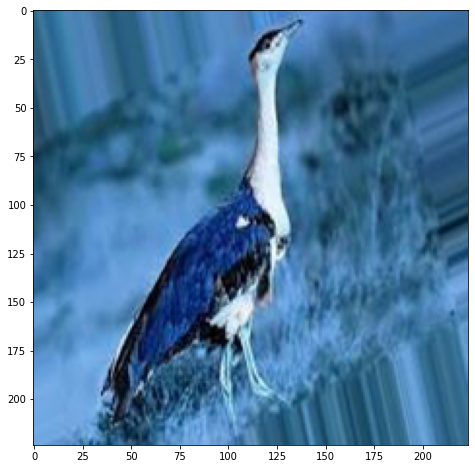

In [44]:
#loading Test Data
print(image_number)
#plotting the test image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[image_number])